In [1]:
from google.colab import files
 
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
df = pd.read_csv('gas_turbines.csv')


In [4]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:

df.columns


Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [10]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [11]:
df.shape


(15039, 11)

In [12]:
# Standardize the numerical features
num_cols = ['AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TEY']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


array([[<Axes: title={'center': 'AT'}>, <Axes: title={'center': 'AP'}>,
        <Axes: title={'center': 'AH'}>],
       [<Axes: title={'center': 'AFDP'}>,
        <Axes: title={'center': 'GTEP'}>,
        <Axes: title={'center': 'TIT'}>],
       [<Axes: title={'center': 'TAT'}>, <Axes: title={'center': 'TEY'}>,
        <Axes: title={'center': 'CDP'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'NOX'}>,
        <Axes: >]], dtype=object)

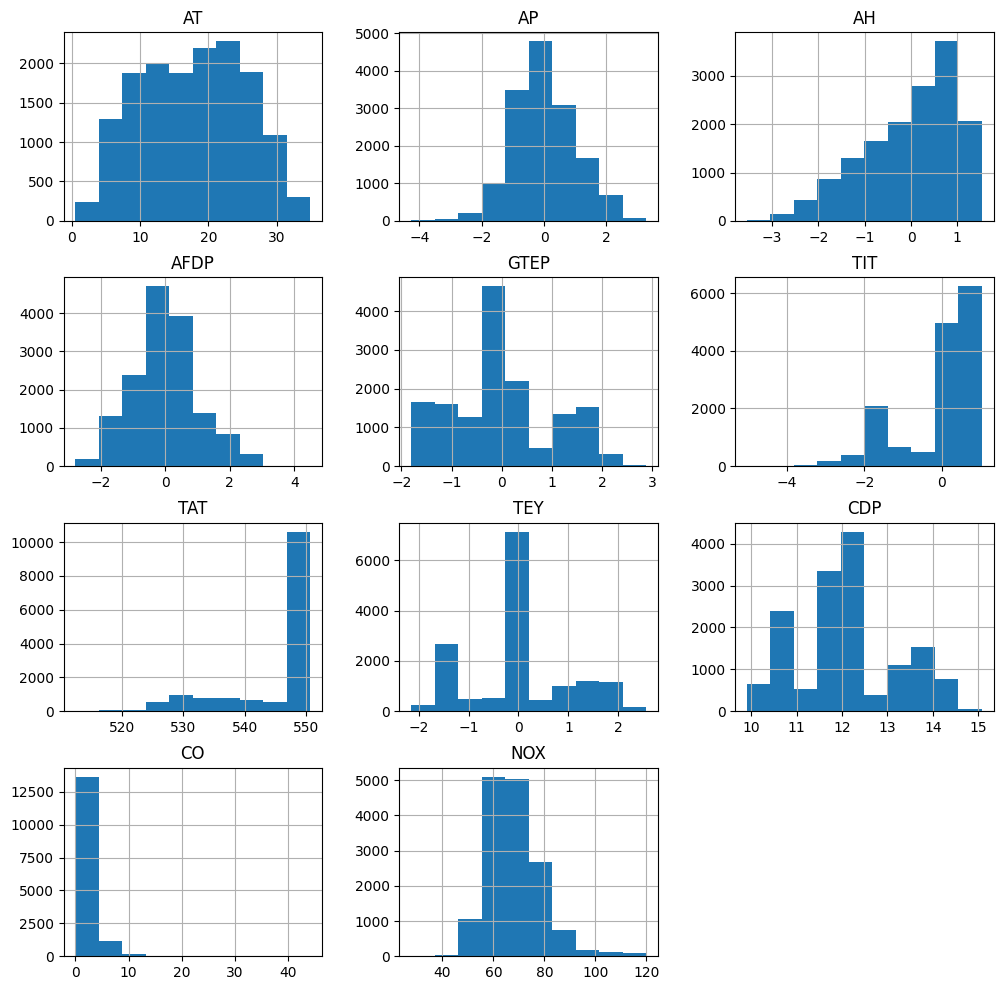

In [15]:
# Plot histograms of all features
df.hist(figsize=(12,12))


<Axes: >

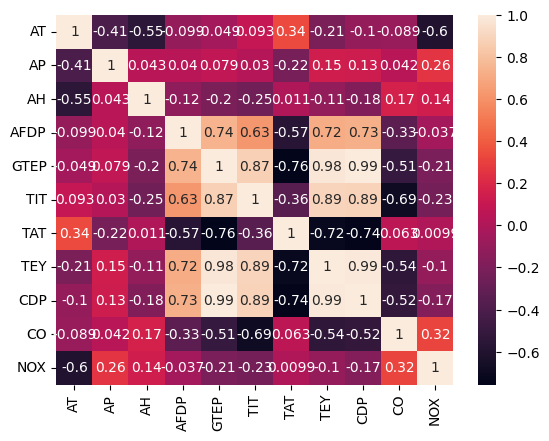

In [16]:
# Plot correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)


In [17]:
# Split data into train and test sets
X = df.drop('TEY', axis=1)
y = df['TEY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Build the neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


In [19]:

# Compile the model
model.compile(optimizer='adam', loss='mse')



In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
301/301 [==============================] - 2s 3ms/step - loss: 80.4570 - val_loss: 0.8210
Epoch 2/100
301/301 [==============================] - 1s 2ms/step - loss: 0.3735 - val_loss: 0.1511
Epoch 3/100
301/301 [==============================] - 1s 4ms/step - loss: 0.0900 - val_loss: 0.0527
Epoch 4/100
301/301 [==============================] - 1s 4ms/step - loss: 0.0333 - val_loss: 0.0194
Epoch 5/100
301/301 [==============================] - 1s 3ms/step - loss: 0.0128 - val_loss: 0.0143
Epoch 6/100
301/301 [==============================] - 1s 2ms/step - loss: 0.0070 - val_loss: 0.0092
Epoch 7/100
301/301 [==============================] - 1s 2ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 8/100
301/301 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0058
Epoch 9/100
301/301 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0060
Epoch 10/100
301/301 [==============================] - 1s 2ms/step - loss: 0.0041 - val_l

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

94/94 [==============================] - 1s 3ms/step


In [22]:
y_pred

array([[ 0.14620566],
       [-1.3078806 ],
       [ 0.08418727],
       ...,
       [ 0.8103378 ],
       [ 1.0257194 ],
       [-1.3350003 ]], dtype=float32)

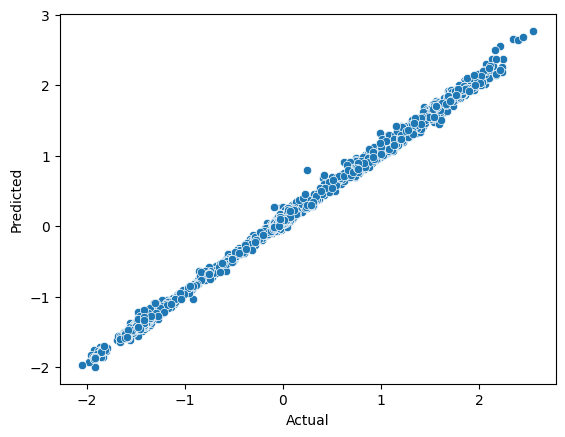

In [23]:
# Plot the actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred.flatten())
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
